## **CNN State of the Art (SOTA)**
https://paperswithcode.com/sota/image-classification-on-imagenet


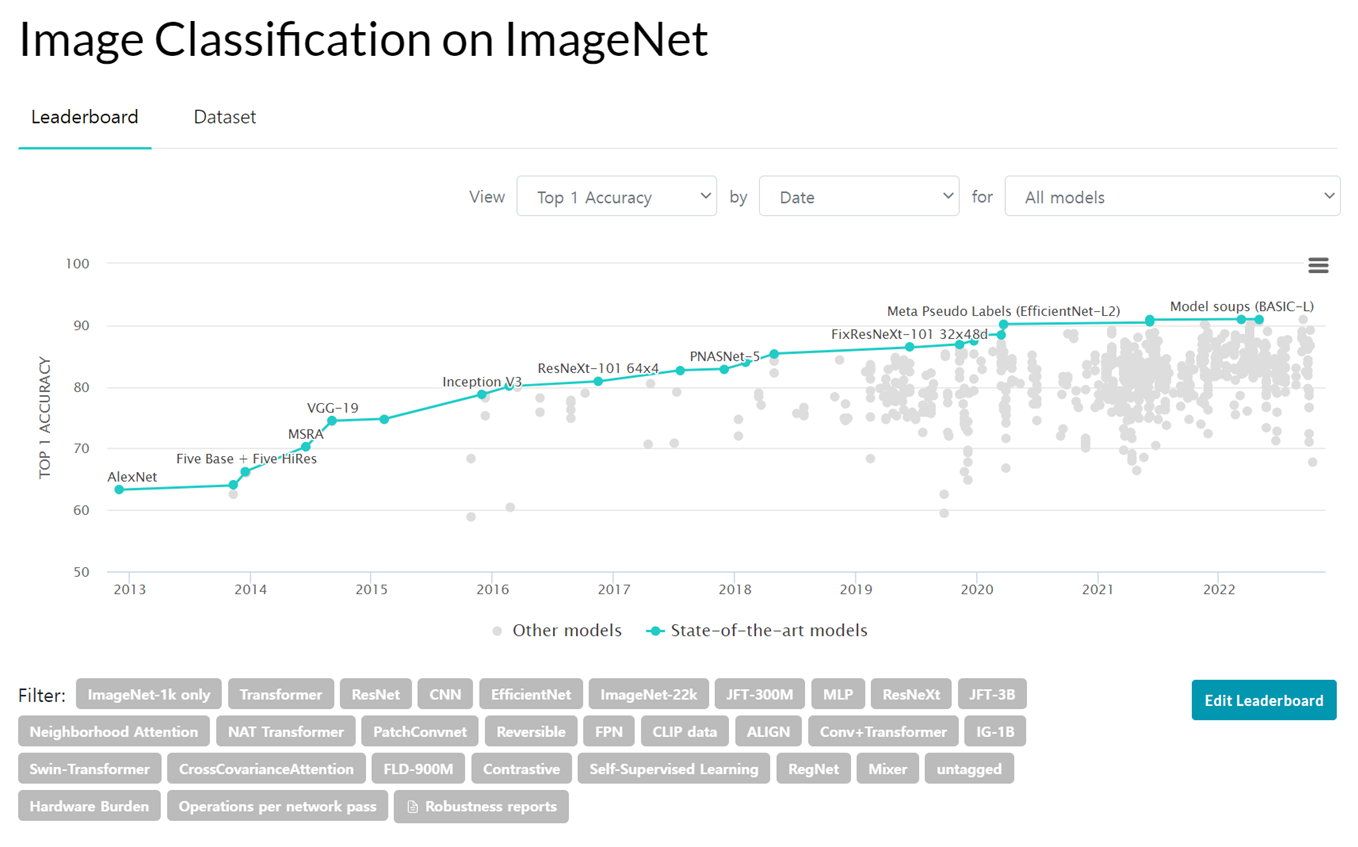

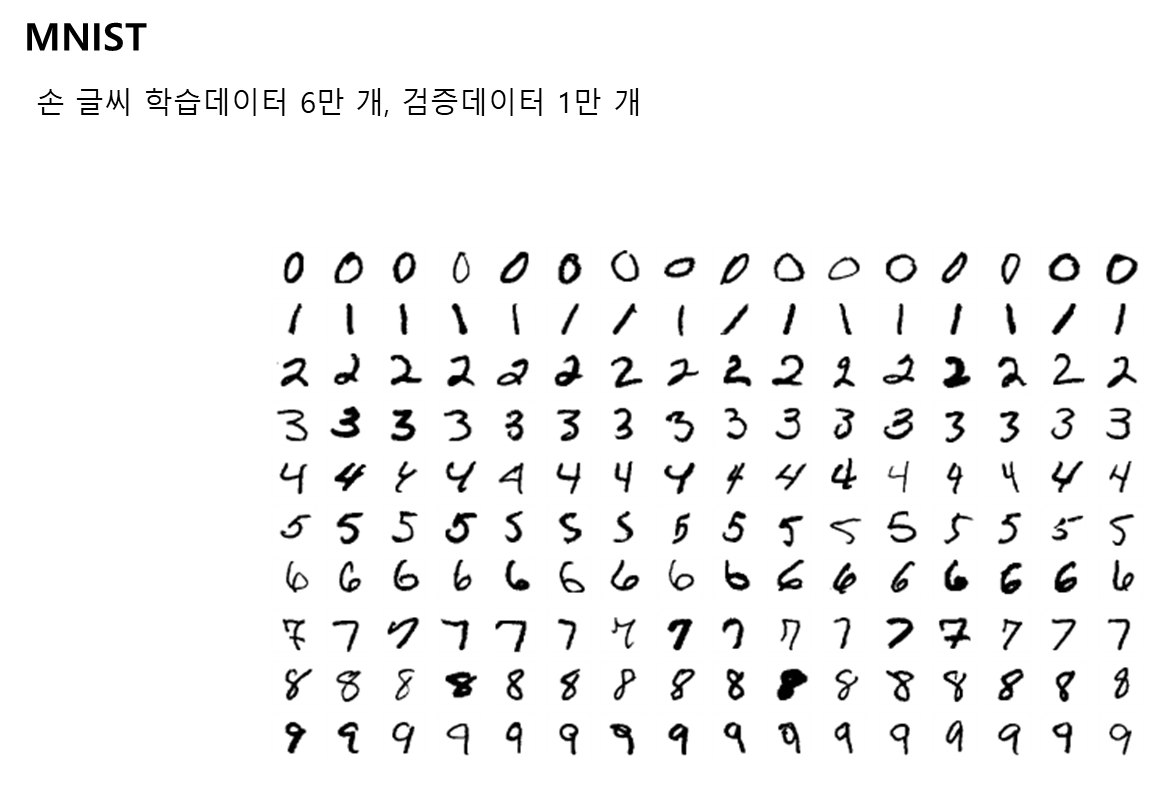

In [ ]:
import pandas as pd
import numpy as np
import os, time, sys

import keras.layers as layers
import keras.optimizers as optimizers
from keras.models import Model, load_model
from keras import layers
from keras import models
from keras.models import load_model

from keras.datasets import mnist

import matplotlib.pyplot as plt
import ipywidgets

In [ ]:
# https://keras.io/api/datasets/mnist/
# 필기체 데이터 셋
(mnist_training_x, mnist_training_y), (mnist_testing_x, mnist_testing_y) = mnist.load_data()
assert mnist_training_x.shape == (60000, 28, 28)
assert mnist_testing_x.shape == (10000, 28, 28)
assert mnist_training_y.shape == (60000,)
assert mnist_testing_y.shape == (10000,)


In [ ]:
idx = 4
plt.imshow(mnist_training_x[idx,:,:])
plt.title(mnist_training_y[idx])
plt.show()

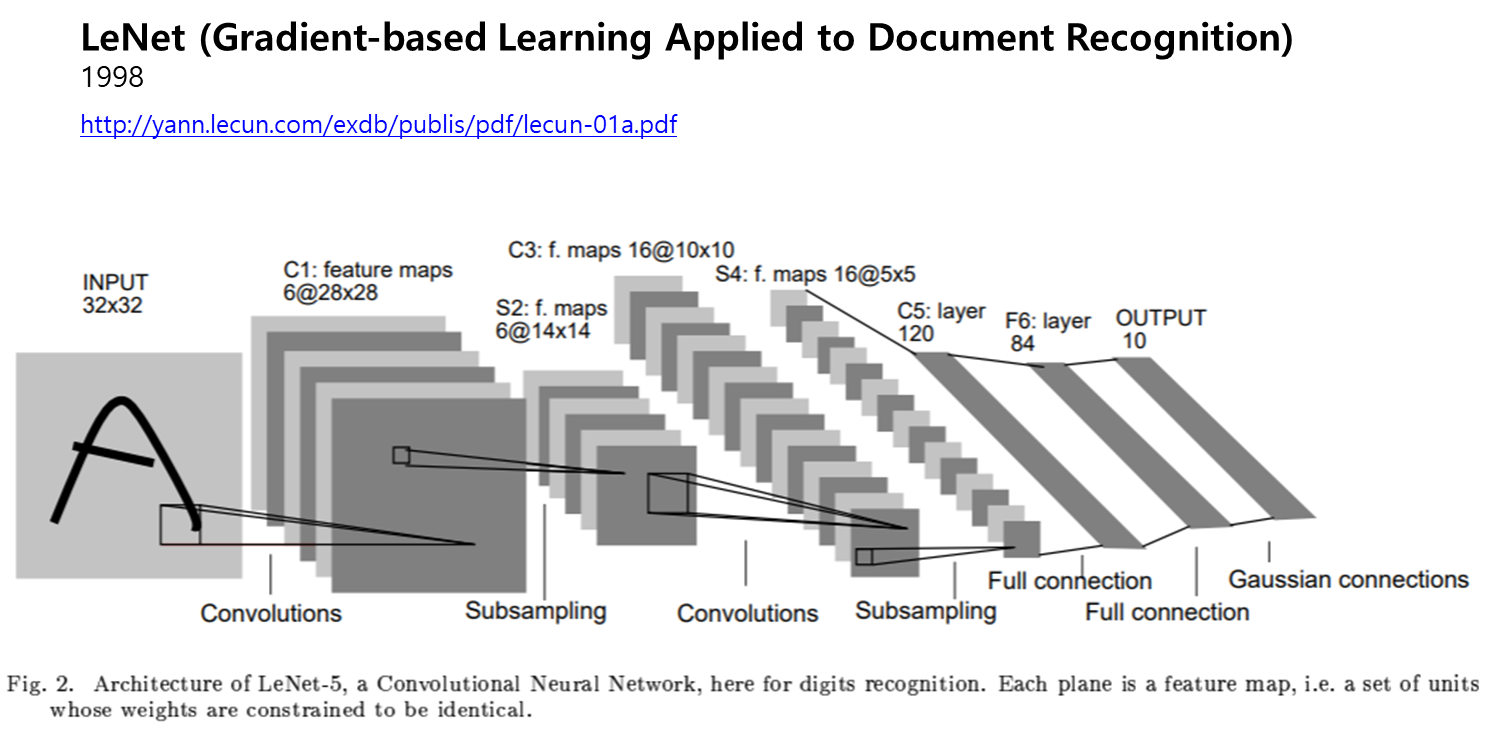

In [ ]:
# LENET 모델
# http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf


inputs = layers.Input(shape=(32, 32, 1))

net = layers.Conv2D(6, kernel_size=5, strides=1, activation='tanh')(inputs)

net = layers.AveragePooling2D(pool_size=2, strides=2)(net)

# Combine Table이 있지만 구현하지 않음
net = layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh')(net)

net = layers.AveragePooling2D(pool_size=2, strides=2)(net)

#flatten 이 아니고 Conv 였음
net = layers.Conv2D(120, kernel_size=5, strides=1, activation='tanh')(net)

net = layers.Flatten()(net)

net = layers.Dense(84, activation='tanh')(net)

net = layers.Dense(10, activation='softmax')(net)


model = Model(inputs=inputs, outputs=net)
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['acc']
)
model.summary()

In [ ]:
# 28x28 mnist 이미지를 32x32 로 패딩 추가함
training_x = np.pad(mnist_training_x, ((0,0),(2,2),(2,2)), 'constant', constant_values=0)
training_x.shape

In [ ]:
# Import the necessary module
from tensorflow.keras.utils import to_categorical

#y 값을 sofrmax 학습하기 위해 더미변환
training_y = mnist_training_y.copy()
# Use to_categorical directly from tensorflow.keras.utils
training_y = to_categorical(training_y, 10)
training_y.shape

In [ ]:
# y 값 확인
print(mnist_training_y[0])
print(training_y[0, :])

In [ ]:
#모델 학습한다.
hist = model.fit(training_x, training_y, epochs=20, batch_size=128)

In [ ]:
testing_x = np.pad(mnist_testing_x, ((0,0),(2,2),(2,2)), 'constant', constant_values=0)
testing_y = mnist_testing_y.copy()
# Use to_categorical directly from tensorflow.keras.utils
testing_y = to_categorical(testing_y, 10)

In [ ]:
# 테스트 데이터로 모델 검증한다.

loss,accuracy= model.evaluate(training_x, training_y)
print('training : loss = ' + str(loss) + ', accuracy = ' + str(accuracy))

loss,accuracy= model.evaluate(testing_x, testing_y)
print('testing : loss = ' + str(loss) + ', accuracy = ' + str(accuracy))

In [ ]:
predict_y = model.predict(testing_x)

In [ ]:
# prompt: predict_y와 testing_y값이 가장 크게 차이가 나는 10개의 index를 찾아줘

import numpy as np

# 예측값과 실제값의 차이를 계산합니다.
diff = np.abs(predict_y - testing_y)

# 각 샘플에 대한 차이의 합을 계산합니다.
sum_diff = np.sum(diff, axis=1)

# 차이가 가장 큰 10개의 인덱스를 찾습니다.
top_10_indices = np.argpartition(sum_diff, -10)[-10:]

print("예측값과 실제값이 가장 크게 차이나는 10개의 인덱스:")
print(top_10_indices)


In [ ]:
# 테스트 데이터 추론 결과 보기
idx = 2896

plt.imshow(testing_x[idx, :, :])
plt.title('real = ' + str(mnist_testing_y[idx]) + ', predict = ' + str(np.where(predict_y[idx,:] == predict_y[idx,:].max())[0][0]))
plt.show()

In [ ]:
#학습 내용 출력용 함수
def diplay_result_layer(layer=0, idx = 0, f_map=0) :
  global model, training_x, training_y, predict_y

  new_model = Model(model.input,model.layers[layer].output) #각 층별로 레이어를 자른다
  predict = new_model.predict(np.array([training_x[idx, :, :]])) #dataseq위치의 학습 데이터를 입력한다

  dpi = 80
  if f_map > predict.shape[3] : f_map =  predict.shape[3]
  img = predict[0, :, :, f_map]

  figsize = 500/float(dpi), 500/float(dpi)
  fig = plt.figure(figsize=figsize)
  plt.imshow(img, cmap='gray')
  plt.title(model.get_layer(index=layer))
  plt.show()

In [ ]:
#위젯을 이용하여  검증 결과 출력하기
ipywidgets.interact(diplay_result_layer, layer=(0, 5, 1), f_map=(0,20,1), idx=(0, training_y.shape[0], 1) )

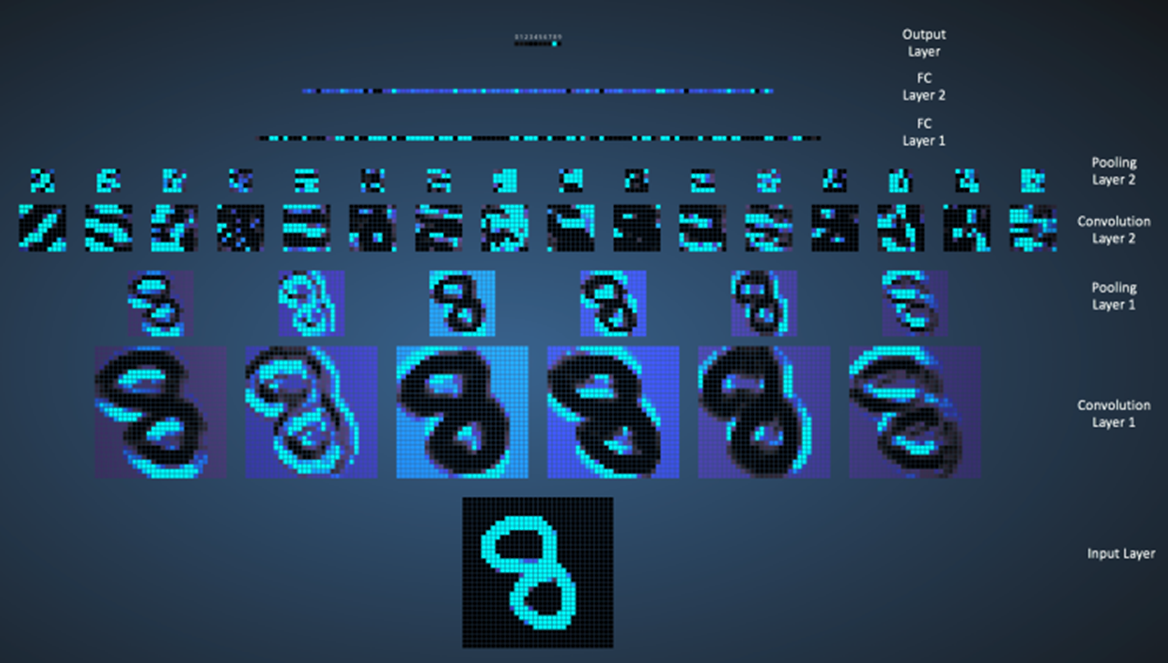